![Py4Eng](img/logo.png)

# TensorFlow
## Yoav Ram

# TensorFlow

[TensorFlow™](https://www.tensorflow.org/) is an **open source** software library for **numerical computation** using **data flow graphs**. **Nodes** in the graph represent **mathematical operations**, while the graph **edges** represent the multidimensional **data arrays** (tensors) communicated between them. 

The flexible architecture allows you to **deploy** computation to one or more **CPUs** or **GPUs** in a **desktop, server, or mobile device** (or cluster, since [v0.8](http://googleresearch.blogspot.co.il/2016/04/announcing-tensorflow-08-now-with.html) Apr 13, 2016) with a single API. 

TensorFlow was originally developed by researchers and engineers working on the **Google Brain Team** within **Google's Machine Intelligence research organization** for the purposes of conducting **machine learning and deep neural networks research**, but the system is general enough to be applicable in a wide variety of other domains as well.

[TensorFlow is great for research, but it’s ready for use in real products too](http://googleresearch.blogspot.co.il/2015/11/tensorflow-googles-latest-machine_9.html). TensorFlow was built from the ground up to be **fast, portable, and ready for production service**. You can move your idea seamlessly from training on your desktop GPU to running on your mobile phone. And you can get started quickly with powerful machine learning tech by using our state-of-the-art example model architectures.

But the most important thing about TensorFlow is that **it’s yours**. We’ve open-sourced TensorFlow as a standalone library and associated tools, tutorials, and examples with the [Apache 2.0 license](https://opensource.org/licenses/Apache-2.0) (a [permissive license](https://en.wikipedia.org/wiki/Apache_License)) so you’re free to use TensorFlow at your institution (no matter where you work).

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Install

There are several paths to [install TensorFlow](https://www.tensorflow.org/versions/master/get_started/os_setup.html). 

We will [use conda](https://www.tensorflow.org/versions/master/get_started/os_setup.html#using-conda) on Mac/Linux:
```
conda install -c conda-forge tensorflow
```
and [pip]() on Windows - for which we must first create a new conda environment with Python 3.5 (as of March 2016 there's no TF build for Python 3.6):
```
conda create -n tensorflow python=3.5 ipykernel numpy
pip install --upgrade https://storage.googleapis.com/tensorflow/windows/cpu/tensorflow-0.12.1-cp35-cp35m-win_amd64.whl
```

In [4]:
import tensorflow as tf
print('TensorFlow', tf.__version__)

TensorFlow 1.0.0


# First example

Following the [introduction](https://www.tensorflow.org/versions/r0.8/get_started/index.html) on the TensorFlow website, we generate some data and fit a line to it.

We create 100 data points ($0<x<1$, $y=0.3 + 0.1x$):

In [5]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

We define a linear model $y = Wx + b$:

In [6]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

We specify a cost function - the squared error - and an optimization method - gradient descent:

In [7]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [8]:
optimizer

We then start a TensorFlow session and initialize the variables:

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Finally we can fit the line by running 200 optimization steps:

In [13]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b), sess.run(loss))

0 [ 0.66439581] [ 0.00969099] 0.0271712
20 [ 0.2399645] [ 0.22868483] 0.00166402
40 [ 0.13464187] [ 0.28234917] 0.000101935
60 [ 0.10857403] [ 0.29563135] 6.24442e-06
80 [ 0.10212211] [ 0.29891875] 3.82523e-07
100 [ 0.10052523] [ 0.29973239] 2.34327e-08
120 [ 0.10013] [ 0.29993376] 1.43564e-09
140 [ 0.10003217] [ 0.29998362] 8.79161e-11
160 [ 0.10000797] [ 0.29999596] 5.39968e-12
180 [ 0.10000198] [ 0.299999] 3.31779e-13
200 [ 0.10000051] [ 0.29999974] 2.25331e-14


Success! we got values that are very much similar to our "real" values - 0.1 and 0.3.

Of course, this is a bit silly, as we could have just used `scipy.stats.linregress` or something similar. Let's move on to a more interesting example.

# MNIST example

We follow the TensorFlow [Deep MNIST for Experts](https://www.tensorflow.org/versions/r0.7/tutorials/mnist/pros/index.html) tutorial. This tutorial is focused on a classic classification problem: identifying hand-written digits. We already used [scikit-learn](ML.ipynb) to address this problem, so we can compare TensorFlow's performence with scikit-learn's.

## Setup

We use TensorFlow's supplied script to load the data:

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
mnist?

The images are 1D arrays of length 784; the labels are one-hot encodes numbers between 0 and 9:

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


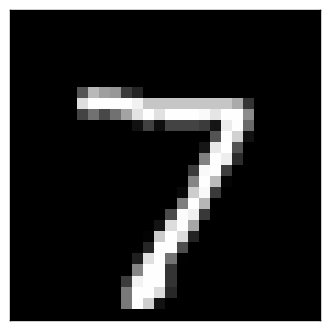

In [13]:
img = mnist.test.images[0].reshape((28, 28))
print(mnist.test.labels[0])
plt.matshow(img, cmap='gray')
plt.xticks([])
plt.yticks([]);

We start an interactive session:

In [14]:
sess = tf.InteractiveSession()

## Build a Softmax Regression model

We start by specifying place holders for the feautres - the pixels - and the labels, `x` and `y_`:

In [15]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
type(x), type(y_)

(tensorflow.python.framework.ops.Tensor,
 tensorflow.python.framework.ops.Tensor)

The Softmax Regression model is a multinomial logistic regression model, described by:
$$
P(y=k|X) = softmax(W_k X + b_k) \\
softmax(z)_j = \frac{e^z_j}{\sum_{I}{e^z_i}}
$$


`W` and `b` are model parameters - `Variable`s.  

In [16]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
type(W), type(b)

(tensorflow.python.ops.variables.Variable,
 tensorflow.python.ops.variables.Variable)

In [17]:
sess.run(tf.initialize_all_variables())

`y` is the predicted value (or more precisely, the predicted probability):

In [18]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
type(y)

tensorflow.python.framework.ops.Tensor

The cost function for softmax regression the the cross entropy function, defined by $-\sum_{k}{y log(y')}$:

In [19]:
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
type(cross_entropy)

tensorflow.python.framework.ops.Tensor

We use a gradient descent optimizer to minimize the cross entropy:

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(cross_entropy)

type(optimizer), type(train_step)

(tensorflow.python.training.gradient_descent.GradientDescentOptimizer,
 tensorflow.python.framework.ops.Operation)

We define the accuracy measure:

In [22]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

We run 1000 steps, each time training on a batch of 50 images (stochastic trainng):

In [23]:
for i in range(10000):
    batch = mnist.train.next_batch(50)
    train_step.run(
        feed_dict={
            x: batch[0], 
            y_: batch[1]
        }
    )
    if i % 100 == 0:
        print(i, accuracy.eval(
            feed_dict={
                x: mnist.test.images, 
                y_: mnist.test.labels
            }
        ))

0 0.4367
100 0.8747
200 0.8976
300 0.9038
400 0.9038
500 0.8975
600 0.907
700 0.9104
800 0.9034
900 0.9057
1000 0.9108
1100 0.904
1200 0.9107
1300 0.9112
1400 0.9174
1500 0.9158
1600 0.9059
1700 0.9148
1800 0.9173
1900 0.9121
2000 0.9206
2100 0.9172
2200 0.9175
2300 0.9186
2400 0.9217
2500 0.9193
2600 0.9188
2700 0.9163
2800 0.9174
2900 0.919
3000 0.9172
3100 0.9139
3200 0.9205
3300 0.9205
3400 0.9183
3500 0.9176
3600 0.9169
3700 0.9207
3800 0.9108
3900 0.9188
4000 0.9181
4100 0.9193
4200 0.9158
4300 0.9225
4400 0.9179
4500 0.919
4600 0.9209
4700 0.9177
4800 0.916
4900 0.9209
5000 0.9192
5100 0.923
5200 0.9128
5300 0.9174
5400 0.9226
5500 0.9171
5600 0.9248
5700 0.9223
5800 0.9175
5900 0.922
6000 0.9194
6100 0.9183
6200 0.9189
6300 0.9202
6400 0.9173
6500 0.9198
6600 0.9152
6700 0.9207
6800 0.9093
6900 0.9136
7000 0.9181
7100 0.9168
7200 0.9156
7300 0.9226
7400 0.9199
7500 0.9232
7600 0.9181
7700 0.9199
7800 0.9209
7900 0.9213
8000 0.9224
8100 0.909
8200 0.9199
8300 0.9184
8400 0.9166


The actual prediction is decided by taking the most probable class. We compare it to the labels, and measure the model accuracy by the fraction of images that had the right prediction.

In [24]:
mnist.train.images.shape

(55000, 784)

In [25]:
acc = accuracy.eval(
    feed_dict={
        x: mnist.test.images, 
        y_: mnist.test.labels
    }
)
print(acc)

0.9218


A 0.92 accuracy is not that good, we had >0.96 with k-nearest neighboors using scikit-learn.

## Multilayer Convolutional Network

To outperform KNN we will use TensorFlow to build a multilayer convolutional neuron network.

This includes applying convolution filters on the images, polling, and then applying a softmax regression. We also use dropouts to reduce over fitting.

**Note** Fitting this model may take several hours!!

We define a function to create weight and bias variables - we'll use it a lot:

In [26]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

We're going to use simple convolutions (stride of one, zero padding) and pooling (max over 2x2 blocks):

In [27]:
def conv2d(x, W):
    return tf.nn.conv2d(
        x, 
        filter=W, 
        strides=[1, 1, 1, 1], 
        padding='SAME'
    )

def max_pool_2x2(x):
    return tf.nn.max_pool(
        x, 
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1], 
        padding='SAME'
    )

### First convolutional layer

The first layer has a convolution followed by max pooling.

The convolution computes 32 features of 5x5 patches; given a 4D input tensor of shape `[batch=-1, in_height=28, in_width=28, in_channels=1]` and a 4D filter / kernel tensor of shape `[filter_height=5, filter_width=5, in_channels=1, out_channels=32]`, the convolution:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels = 5*5*1, out_channels=32]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch=-1, out_height=28, out_width=28, filter_height * filter_width * in_channels = 5*5*1]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.
   
So the convolution accepts `batches x 28 x 28 x 1` data shape and returns `batches x 28 x 28 x 32`.
   
We then add the bias vector and apply a ReLu activation function ($f(x)=max(0,x)$).

The pooling computes the max of every 2x2 patch, thus reducing the data shape to `batches x 14 x 14 x 32`.

In [28]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

### Second convolutional layer

We add another convolution + pooling layer, the 2nd layer will have 64 features. The input has 32 channels (from the previous 32 features) but he data arrays are smaller (14x14) due to the previous pooling:

In [29]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

The data is now is shape `batchesx7x7x64`.

### Densely connected layer

Now we add a fully-connected layer with 1024 neurons. This is done by matrix multiplication with a 7*7*64 x 1024 weight matrix. We add bias, and apply an activation function, as before:

In [30]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

### Dropout layer

We apply a dropout to reduce overfitting: the dropout stochasticly removes neurons (outputs of the previous layer) and automatically scales the neurons it retained so that their expected sum remains unchanged. `dropout` accepts a `keep_prob` argument which defines the probability that a neuron is kept. We provide this probability as a `placeholder` to that dropout can be turned on (during training) and off (during testing / predicting).

In [31]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout layer

We add a Softmax regression layer, similar to the previous, simpler example, including the regression coefficients, bias, and the softmax function:

In [32]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

### Training

To train the model we need to define a cost function: we'll use the same cross entropy function as before. We also use the same measure for accuracy - we predict the most likelihood class and check that it is the correct label.

We use a more sophisticated optimizer that uses the [ADAM algorithm](http://arxiv.org/pdf/1412.6980.pdf): an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.

In [33]:
cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
optimizer = tf.train.AdamOptimizer(1e-4)
train_step = optimizer.minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Finally, we run the stochastic training by batches.

**Note** this can take several hours. If you just want to see it work, change `n_steps` to a much smaller value. 

In [48]:
sess.run(tf.initialize_all_variables())

n_steps = 20000
for i in range(n_steps):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(
            feed_dict={
                x:batch[0], 
                y_: batch[1], 
                keep_prob: 1.0
            }
        )
        print("step {:d}, training accuracy {:g}".format(i, train_accuracy))
    train_step.run(
        feed_dict={
            x: batch[0], 
            y_: batch[1], 
            keep_prob: 0.5
        }
    )

acc = accuracy.eval(
    feed_dict={
        x: mnist.test.images, 
        y_: mnist.test.labels, 
        keep_prob: 1.0
    }
)
print("test accuracy {:g}".format(acc))

step 0, training accuracy 0.1
step 100, training accuracy 0.72
step 200, training accuracy 0.9
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.96
step 700, training accuracy 0.94
step 800, training accuracy 0.98
step 900, training accuracy 0.98
step 1000, training accuracy 0.96
step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 1
step 1400, training accuracy 0.96
step 1500, training accuracy 0.96
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 0.96
step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 1
step 2500, training accuracy 0.94
step 2600, training accuracy 0.98
step 2700, training accuracy 0.98
step 2800, training accuracy 0.96
step 2900, training accuracy 0.98
step 3000, t

Interestingly, the neural network very quickly achieves a better accuracy than the previous approach - after 300 steps the accuracy is > 0.94. It then fluctuates for a long time between 0.96 and 1. After 20000 steps the accuracy is 0.9925, a >99% accuracy.

# TensorFlow Learn

Working directly with the `tensorflow` package provides a comprehensive API to the TensorFlow framework. 

However, a high-level package, called [TensofrFlow Learn](https://terrytangyuan.github.io/2016/03/14/scikit-flow-intro/), formerly scikit-flow, is also available. It wraps `tensorflow` with an API that is very similar to that of **Scikit-learn**. TensorFlow Learn is a **simplified interface** for TensorFlow, to get people started on predictive analytics and data mining. It helps smooth the transition from the Scikit-learn world of **one-liner machine learning** into the more open world of **building different shapes of ML models**. 

You can start by using fit/predict and slide into TensorFlow APIs as you are getting comfortable. It’s Scikit-learn compatible so you can also benefit from Scikit-learn features like `GridSearch` and `Pipeline`.

See more information on the [Tensorflow Learn repo](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/learn/python/learn).

# References

- [TensorFlow website](https://www.tensorflow.org/) has several tutorials, good documentation, extensive setup manual, and more resources.
- [Another tutorial](https://medium.com/@ilblackdragon/tensorflow-tutorial-part-1-c559c63c0cb1#.z97mucter) by Illia Polosukhin.

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.0, [IPython](http://ipython.org/) 5.2.2, [Jupyter](http://jupyter.org) 4.3.0.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)